In [1]:
import pandas as pd

data = pd.read_csv(r'/home/jonathan/Documents/IDATT2502/IDATT2502 - Machine Learning/A7/agaricus-lepiota.data')
data.pop('edibility')

dummies = pd.get_dummies(data)
data.head()

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


Task 1:
* Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).

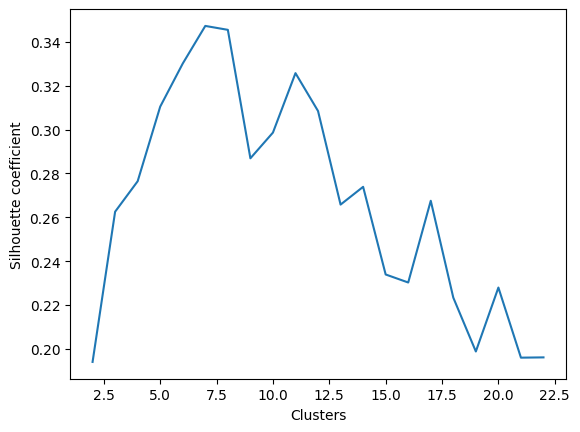

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components=23)
df_pca = pca.fit_transform(dummies)
k = range(2, 23)
sc = []

for n in k:
    kmeans_pca = KMeans(n_clusters=n, init= 'k-means++')
    kmeans_pca.fit(df_pca)
    sc.append(metrics.silhouette_score(df_pca, kmeans_pca.labels_, metric='euclidean'))

plt.figure()
plt.xlabel('Clusters')
plt.ylabel('Silhouette coefficient')
plt.plot(k, sc)
plt.show()

It looks like the optimal number of clusters for the dataset is around 7.

Task 2:
* Plot this metric while increasing the number of clusters, e.g., $k=2..30$ (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).

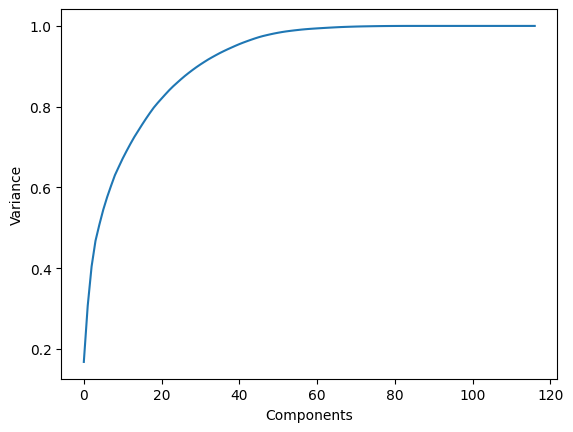

In [8]:
pca_variance = PCA()
pca_variance.fit(dummies)
amount = len(pca_variance.explained_variance_)

plt.plot(range(0, amount), pca_variance.explained_variance_ratio_.cumsum())
plt.xlabel('Components')
plt.ylabel('Variance')
plt.show()

Task 3:
* Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

In [4]:
pca_transform = pca.fit_transform(dummies)

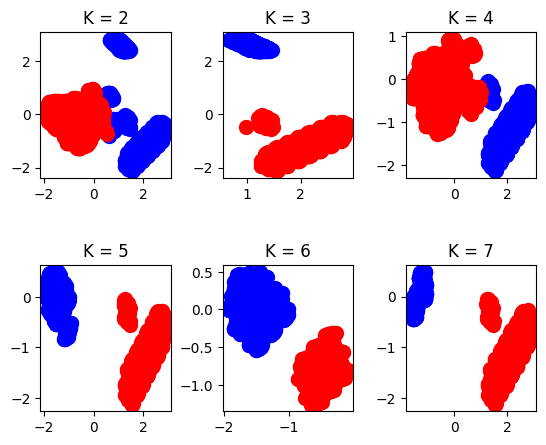

In [9]:
figure, axs = plt.subplots(2,3)
plt.subplots_adjust(top = 0.8, bottom=0.01, hspace=0.6, wspace=0.4)

for i in range(1,7):
    k = i+1
    x = int((i-1)/3)
    y = ((i-1)%3)

    kmeans = KMeans(n_clusters=k, init= 'k-means++')
    Ypreds = kmeans.fit_predict(pca_transform)

    axs[x, y].title.set_text(f'K = {k}')
    axs[x, y].scatter(pca_transform[Ypreds == 0, 0], pca_transform[Ypreds == 0, 1], s = 100, c = 'blue', label = 'edible')
    axs[x, y].scatter(pca_transform[Ypreds == 1, 0], pca_transform[Ypreds == 1, 1], s = 100, c = 'red', label = 'poisonous')

plt.show()